# Getting the Million Song Dataset (HDF5)

The Million Song Dataset is a freely-available collection of audio features and metadata for a million contemporary popular music tracks.
Most of the information is provided by The Echo Nest. The dataset is the result of a collaboration between The Echo Nest and LabROSA at Columbia University, supported in part by the NSF. (last update November 2015)

Links:
http://labrosa.ee.columbia.edu/millionsong/pages/getting-dataset#subset
https://aws.amazon.com/datasets/million-song-dataset/

Note: For this project only the subset consisting of 10,000 songs (1%, 1.8 gb) selected at random was used as the whole data set amounts to almost 300GB. 

## 1) GET DATA

In [1]:
#load all of the necessary modules
import pandas as pd #as alias pd
import numpy as nm
import sys
sys.path.append('/Users/juliaengel-dagher/Desktop/MSongsDB/PythonSrc')

In [2]:
#Data Load
#the files are in h5 format 
import hdf5_utils as HDF5
import hdf5_getters as g
h5 = HDF5.open_h5_file_read('/Users/juliaengel-dagher/Desktop/TRBAADN128F426B7A4.h5')

need pg module and MBrainzDB folder of Python source code if you
want to use musicbrainz related functions, e.g. fill_hdf5_from_musicbrainz


In [3]:
import glob
files = glob.glob('/Users/juliaengel-dagher/Downloads/MillionSongSubset/data/*/*/*/*.h5')

In [4]:
len(files)

10000

In [5]:
% time
artist_names = []
song_ids = []
song_titles =[]
song_durations =[]
song_release_years =[] #year when this song was released, according to musicbrainz.org
song_hotness  =[]
song_tempo = []
song_energies = []
song_danceability = []
song_bars =[]
song_beats = []
song_time_signatures =[]
song_tatum =[]
song_modes=[]
song_keys=[]
artist_familiarty = []
artist_hotness = []

for f in files:
    
    h5 = HDF5.open_h5_file_read(f)
    
    song_id = g.get_song_id(h5)
    song_title = g.get_title(h5)
    song_duration = g.get_duration(h5)
    song_release_year = g.get_year(h5)
    song_hot = g.get_song_hotttnesss (h5)
    song_speed = g.get_tempo(h5)
    song_energy = g.get_energy(h5)
    artist_name = g.get_artist_name(h5)
    song_dance = g.get_danceability(h5)
    song_bar = g.get_bars_start(h5)
    song_beat = g.get_beats_start(h5)
    song_time_signature = g.get_time_signature(h5)
    song_tat = g.get_tatums_start(h5)
    song_mode = g.get_mode(h5)
    song_key = g.get_key(h5)
    artist_familar = g.get_artist_familiarity(h5)
    artist_hot = g.get_artist_hotttnesss(h5)
    
    song_ids.append(song_id)
    song_titles.append(song_title)
    song_durations.append(song_duration)
    song_release_years.append(song_release_year)
    song_hotness.append(song_hot)
    song_energies.append(song_energy)
    song_tempo.append(song_speed)
    artist_names.append(artist_name)
    song_danceability.append(song_dance)
    song_bars.append(song_bar)
    song_beats.append(song_beat)
    song_time_signatures.append(song_time_signature)
    song_tatum.append(song_tat)
    song_modes.append(song_mode)
    song_keys.append(song_key)
    artist_familiarty.append(artist_familar)
    artist_hotness.append(artist_hot)
    
    h5.close()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


In [6]:
data = {'song_ids':song_ids
        ,'song_titles':song_titles
        ,'song_durations':song_durations
        ,'song_realease_years':song_release_years
        ,'artist_names':artist_names
        ,'song_hotness':song_hotness
        ,'song_tempo':song_tempo
        ,'song_energies':song_energies
        ,'song_danceability':song_danceability
        ,'song_bars':song_bars
        ,'song_beats':song_beats
        ,'song_time_signatures':song_time_signatures
        ,'song_tatum':song_tatum
        ,'song_modes':song_modes
        ,'song_keys':song_keys
        ,'artist_familiarty':artist_familiarty
        ,'artist_hotness':artist_hotness
       }

In [7]:
df=pd.DataFrame(data)

In [8]:
df.to_csv('music_project.csv', sep=',')

In [11]:
df = pd.read_csv('music_project.csv')

In [8]:
df

,artist_familiarty,artist_hotness,artist_names,song_bars,song_beats,song_danceability,song_durations,song_energies,song_hotness,song_ids,song_keys,song_modes,song_realease_years,song_tatum,song_tempo,song_time_signatures,song_titles
0,0.581794,0.401998,Casual,"[0.58521, 2.94247, 5.14371, 7.74554, 10.36149,...","[0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...",0,218.93179,0,0.602120,SOMZWCG12A8C13C480,1,0,0,"[0.28519, 0.58521, 0.89422, 1.19196, 1.49119, ...",92.198,4,I Didn't Mean To
1,0.630630,0.417500,The Box Tops,"[0.71054, 2.71502, 4.70861, 6.69288, 8.66941, ...","[0.20627, 0.71054, 1.21836, 1.71841, 2.21729, ...",0,148.03546,0,NaN,SOCIWDW12A8C13D406,6,0,1969,"[0.20627, 0.45904, 0.71054, 0.96834, 1.21836, ...",121.274,4,Soul Deep
2,0.487357,0.343428,Sonora Santanera,"[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....","[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....",0,177.47546,0,NaN,SOXVLOJ12AB0189215,8,1,0,"[0.42132, 0.73152, 1.06609, 1.39732, 1.72854, ...",100.070,1,Amor De Cabaret
3,0.630382,0.454231,Adam Ant,"[1.30621, 3.29887, 5.30252, 7.32327, 9.33775, ...","[0.81002, 1.30621, 1.80617, 2.2996, 2.80049, 3...",0,233.40363,0,NaN,SONHOTT12A8C13493C,0,1,1982,"[0.56254, 0.81002, 1.05749, 1.30621, 1.55494, ...",119.293,4,Something Girls
4,0.651046,0.401724,Gob,"[1.06368, 2.91491, 4.76729, 6.61852, 8.46978, ...","[0.13576, 0.59914, 1.06368, 1.52591, 1.99045, ...",0,209.60608,0,0.604501,SOFSOCN12A8C143F5D,2,1,2007,"[0.13576, 0.36918, 0.59914, 0.83141, 1.06368, ...",129.738,4,Face the Ashes
5,0.535293,0.385471,Jeff And Sheri Easter,"[1.17118, 2.44699, 3.76552, 5.07403, 6.38454, ...","[0.74856, 1.17118, 1.59278, 2.0154, 2.44699, 2...",0,267.70240,0,NaN,SOYMRWW12A6D4FAB14,5,1,0,"[0.53929, 0.74856, 0.95987, 1.17118, 1.38249, ...",147.782,3,The Moon And I (Ordinary Day Album Version)
6,0.556496,0.261941,Rated R,"[0.27253, 0.70535, 1.13191, 1.53913, 1.94418, ...","[0.27253, 0.70535, 1.13191, 1.53913, 1.94418, ...",0,114.78159,0,NaN,SOMJBYD12A6D4F8557,1,1,0,"[0.05611, 0.27253, 0.48785, 0.70535, 0.92722, ...",111.787,1,Keepin It Real (Skit)
7,0.801136,0.605507,Tweeterfriendly Music,"[0.65428, 2.42697, 4.21143, 5.98706, 7.74357, ...","[0.65428, 1.24174, 1.83362, 2.42697, 3.02032, ...",0,189.57016,0,NaN,SOHKNRJ12A6701D1F8,4,0,0,"[0.36129, 0.65428, 0.94433, 1.24174, 1.53768, ...",101.430,3,Drop of Rain
8,0.426668,0.332276,Planet P Project,"[1.91886, 4.69392, 7.46235, 10.22307, 12.98979...","[1.22595, 1.91886, 2.6098, 3.30422, 3.9995, 4....",0,269.81832,0,0.265861,SOIAZJW12AB01853F1,4,1,1984,"[1.22595, 1.39961, 1.57241, 1.74174, 1.91886, ...",86.643,4,Pink World
9,0.550514,0.422706,Clp,"[0.62445, 2.73661, 4.83785, 6.94481, 9.04649, ...","[0.09933, 0.62445, 1.15423, 1.68069, 2.20947, ...",0,266.39628,0,NaN,SOUDSGM12AC9618304,7,0,0,"[0.09933, 0.36057, 0.62445, 0.88967, 1.15423, ...",114.041,4,Insatiable (Instrumental Version)


In [13]:
last_ten_years = data_frame[data_frame['song_realease_years'] > 2005]

NameError: name 'data_frame' is not defined

In [189]:
for i in df.song_ids:
    if "SOFSOCN12A8C143F5D" == i:
        print i

SOFSOCN12A8C143F5D


In [104]:
last_ten_years

,artist_name,song_durations,song_hotness,song_ids,song_realease_years,song_speeds,song_tempo,song_titles
4,Gob,209.60608,0.604501,SOFSOCN12A8C143F5D,2007,129.738,0,Face the Ashes
40,Scarlet's Remains,198.73914,0.450992,SOMSBGZ12AB018C4CB,2007,115.061,0,Spin
48,Casiotone For The Painfully Alone,175.72526,0.785892,SOTUNMH12A6D4FA3E6,2006,141.919,0,Nashville Parthenon
51,Eliane Elias,251.42812,0.434838,SOPHYIS12AAF3B35A3,2009,86.091,0,The More I See You
100,Mira,177.81506,NaN,SOUQVUD12A8C142DCE,2006,85.621,0,Openbare Weg
123,Wolfmother,212.37506,NaN,SOCHXAE12AF72A25D6,2009,110.745,0,White Feather
127,Jupiter Rising,193.46240,0.215080,SOGMXBW12A6D4FB8D7,2007,119.979,0,They Say (Album)
136,Cama,210.36363,NaN,SOBUWPY12A8C1446C0,2009,155.074,0,In This Life
155,Enthroned,240.74404,0.543053,SOXCWTT12AC9075756,2010,135.535,0,The Vitalized Shell
161,Pearl Jam,428.56444,0.659305,SOHTWLT12A8C13CFE1,2006,105.994,0,Inside Job


## Reading in Text File of User Behavior

In [74]:
# path_to_data = '/Users/juliaengel-dagher/Downloads/train_triplets.txt'
path_to_data = '/Users/juliaengel-dagher/Downloads/train_triplets.txt'
# users = pd.read_table(path_to_data)
#create second dataframe for merged data?
#merge
# user_df = df.merge(users,left_on='song_ids', how='inner')

In [79]:
path_to_data = '/Users/juliaengel-dagher/Downloads/train_triplets.txt'

In [80]:
users = pd.read_table(path_to_data, sep='\t', names= ['user','song_id','listen_count'])

In [ ]:
users

In [81]:
s=users.groupby('song_id').sum()['listen_count']

In [ ]:
s.head()

In [82]:
song_df = pd.DataFrame(data=s, columns=['song_id','listen_count'])

In [83]:
user_df = df.merge(song_df,left_on='song_ids',right_on='song_id', how='inner')

In [84]:
user_df

,artist_familiarty,artist_hotness,artist_names,song_bars,song_beats,song_danceability,song_durations,song_energies,song_hotness,song_ids,...,song_modes,song_realease_years,song_tatum,song_tempo,song_time_signatures,song_titles,count,beats_number,song_id,listen_count


## 2) ANALYSIS

Questions: 
    1. what influences song danceability/energy/hotness?
    2. what leads to artist hotness?
    3. what do users listen to the most?

In [43]:
df.describe()

,artist_familiarty,artist_hotness,song_danceability,song_durations,song_energies,song_hotness,song_keys,song_modes,song_realease_years,song_tempo,song_time_signatures,count,beats_number
count,9996.000000,10000.000000,10000,10000.000000,10000,5648.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
mean,0.565456,0.385552,0,238.507518,0,0.342822,5.276100,0.691100,934.704600,122.915449,3.564800,1,480.994500
std,0.160161,0.143647,0,114.137514,0,0.247220,3.554087,0.462063,996.650657,35.184412,1.266239,0,273.768992
min,0.000000,0.000000,0,1.044440,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
25%,0.467611,0.325266,0,176.032200,0,0.000000,2.000000,0.000000,0.000000,96.965750,3.000000,1,317.000000
50%,0.563666,0.380742,0,223.059140,0,0.360371,5.000000,1.000000,0.000000,120.161000,4.000000,1,434.000000
75%,0.668020,0.453858,0,276.375060,0,0.537504,8.000000,1.000000,2000.000000,144.013250,4.000000,1,588.000000
max,1.000000,1.082503,0,1819.767710,0,1.000000,11.000000,1.000000,2010.000000,262.828000,7.000000,1,7880.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 1 to 9999
Data columns (total 18 columns):
artist_familiarty       4680 non-null float64
artist_hotness          4680 non-null float64
artist_names            4680 non-null object
song_bars               4680 non-null object
song_beats              4680 non-null object
song_danceability       4680 non-null float64
song_durations          4680 non-null float64
song_energies           4680 non-null float64
song_hotness            3064 non-null float64
song_ids                4680 non-null object
song_keys               4680 non-null int64
song_modes              4680 non-null int64
song_realease_years     4680 non-null int64
song_tatum              4680 non-null object
song_tempo              4680 non-null float64
song_time_signatures    4680 non-null int64
song_titles             4680 non-null object
count                   4680 non-null int64
dtypes: float64(7), int64(5), object(6)
memory usage: 694.7+ KB


In [10]:
df['song_beats'].head()

0    [0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...
1    [0.20627, 0.71054, 1.21836, 1.71841, 2.21729, ...
2    [0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....
3    [0.81002, 1.30621, 1.80617, 2.2996, 2.80049, 3...
4    [0.13576, 0.59914, 1.06368, 1.52591, 1.99045, ...
Name: song_beats, dtype: object

## 3) VISUALIZATION

### Matplotlib

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [12]:
df['count'] = 1

In [18]:
df['beats_number'] = [len(x) for x in df.song_beats]

In [19]:
df.head()

,artist_familiarty,artist_hotness,artist_names,song_bars,song_beats,song_danceability,song_durations,song_energies,song_hotness,song_ids,song_keys,song_modes,song_realease_years,song_tatum,song_tempo,song_time_signatures,song_titles,count,beats_number
0,0.581794,0.401998,Casual,"[0.58521, 2.94247, 5.14371, 7.74554, 10.36149,...","[0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...",0,218.93179,0,0.602120,SOMZWCG12A8C13C480,1,0,0,"[0.28519, 0.58521, 0.89422, 1.19196, 1.49119, ...",92.198,4,I Didn't Mean To,1,344
1,0.630630,0.417500,The Box Tops,"[0.71054, 2.71502, 4.70861, 6.69288, 8.66941, ...","[0.20627, 0.71054, 1.21836, 1.71841, 2.21729, ...",0,148.03546,0,NaN,SOCIWDW12A8C13D406,6,0,1969,"[0.20627, 0.45904, 0.71054, 0.96834, 1.21836, ...",121.274,4,Soul Deep,1,296
2,0.487357,0.343428,Sonora Santanera,"[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....","[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....",0,177.47546,0,NaN,SOXVLOJ12AB0189215,8,1,0,"[0.42132, 0.73152, 1.06609, 1.39732, 1.72854, ...",100.070,1,Amor De Cabaret,1,291
3,0.630382,0.454231,Adam Ant,"[1.30621, 3.29887, 5.30252, 7.32327, 9.33775, ...","[0.81002, 1.30621, 1.80617, 2.2996, 2.80049, 3...",0,233.40363,0,NaN,SONHOTT12A8C13493C,0,1,1982,"[0.56254, 0.81002, 1.05749, 1.30621, 1.55494, ...",119.293,4,Something Girls,1,462
4,0.651046,0.401724,Gob,"[1.06368, 2.91491, 4.76729, 6.61852, 8.46978, ...","[0.13576, 0.59914, 1.06368, 1.52591, 1.99045, ...",0,209.60608,0,0.604501,SOFSOCN12A8C143F5D,2,1,2007,"[0.13576, 0.36918, 0.59914, 0.83141, 1.06368, ...",129.738,4,Face the Ashes,1,444


In [49]:
df = df[df['song_realease_years']!=0]

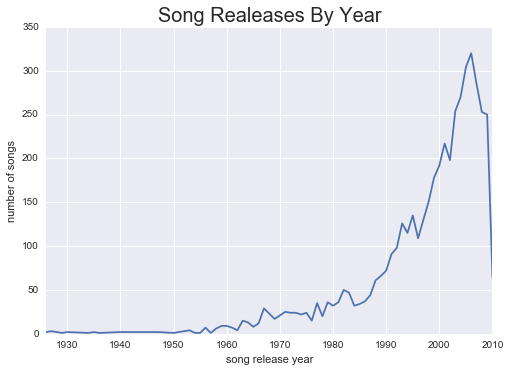

In [52]:
f=df.groupby('song_realease_years').sum()['count'].plot()
f=plt.title('Song Realeases By Year',fontsize=20)
f=plt.ylabel('number of songs')
f=plt.xlabel('song release year')

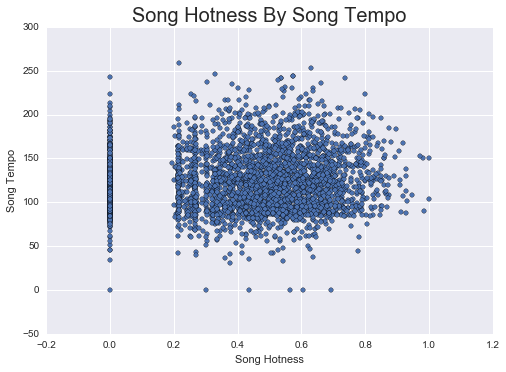

In [59]:
df.plot(x='song_hotness', y='song_tempo', kind='scatter')
f=plt.title('Song Hotness By Song Tempo',fontsize=20)
f=plt.ylabel('Song Tempo')
f=plt.xlabel('Song Hotness')

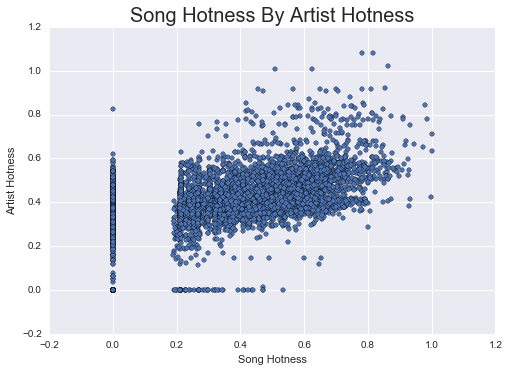

In [45]:
df.plot(x='song_hotness', y='artist_hotness', kind='scatter')
f=plt.title('Song Hotness By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Song Hotness')

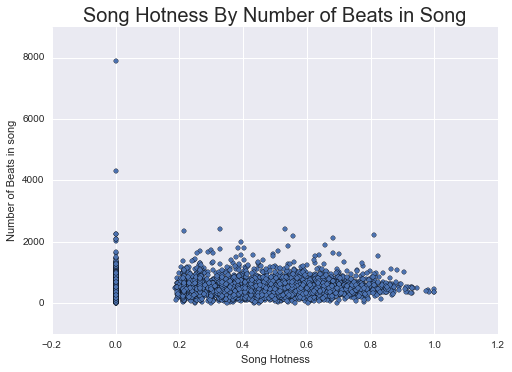

In [22]:
df.plot(x='song_hotness', y='beats_number', kind='scatter')
f=plt.title('Song Hotness By Number of Beats in Song',fontsize=20)
f=plt.ylabel('Number of Beats in song')
f=plt.xlabel('Song Hotness')

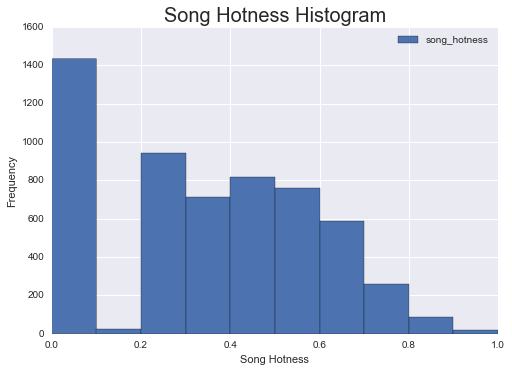

In [37]:
df.plot(x='beats_number', y='song_hotness', kind='hist')
f=plt.title('Song Hotness Histogram',fontsize=20)
f=plt.xlabel('Song Hotness')

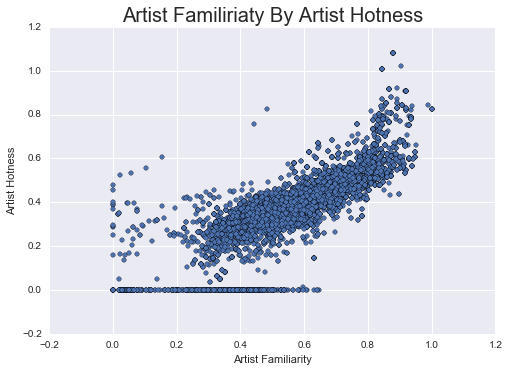

In [48]:
df.plot(x='artist_familiarty', y='artist_hotness', kind='scatter')
f=plt.title('Artist Familiriaty By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Artist Familiarity')

### seaborn

In [38]:
import seaborn as sb

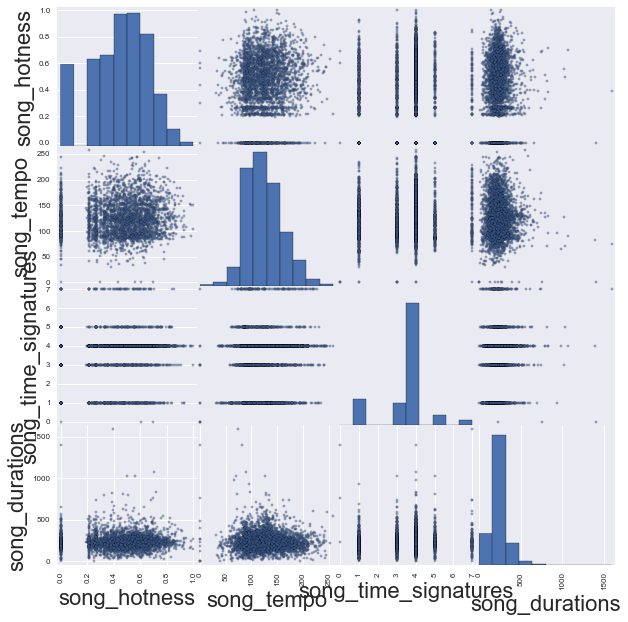

In [173]:
sb.set(font_scale=2)
_ = pd.scatter_matrix(df[['song_hotness', 'song_tempo', 'song_time_signatures', 'song_durations']], figsize=(10,10))

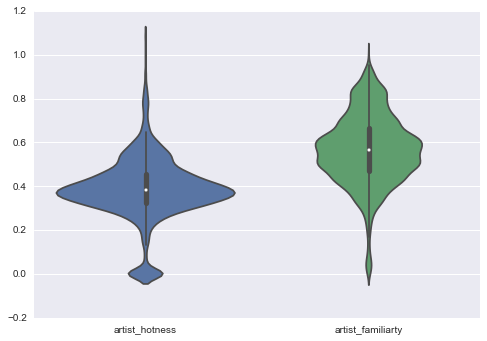

In [73]:
f = sb.violinplot(df[['artist_hotness','artist_familiarty']])

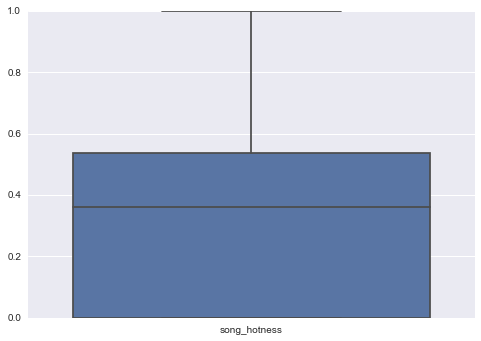

In [85]:
f = sb.boxplot(df[['song_hotness']])

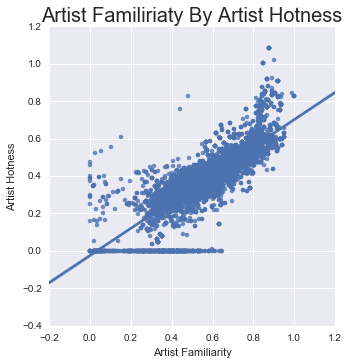

In [86]:
f=sb.lmplot('artist_familiarty','artist_hotness', df)
f=plt.title('Artist Familiriaty By Artist Hotness',fontsize=20)
f=plt.ylabel('Artist Hotness')
f=plt.xlabel('Artist Familiarity')

### vincent

In [24]:
import vincent
reload(vincent)
vincent.initialize_notebook()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 1 to 9999
Data columns (total 18 columns):
artist_familiarty       4680 non-null float64
artist_hotness          4680 non-null float64
artist_names            4680 non-null object
song_bars               4680 non-null object
song_beats              4680 non-null object
song_danceability       4680 non-null float64
song_durations          4680 non-null float64
song_energies           4680 non-null float64
song_hotness            3064 non-null float64
song_ids                4680 non-null object
song_keys               4680 non-null int64
song_modes              4680 non-null int64
song_realease_years     4680 non-null int64
song_tatum              4680 non-null object
song_tempo              4680 non-null float64
song_time_signatures    4680 non-null int64
song_titles             4680 non-null object
count                   4680 non-null int64
dtypes: float64(7), int64(5), object(6)
memory usage: 694.7+ KB


In [113]:
song_count = df.groupby('song_realease_years')[['count']].sum()
song_count.index = pd.to_datetime(song_count.index, format="%Y")
vincent.Line(song_count)

In [31]:
song_hot_tempo = df.groupby('song_hotness')[['beats_number']].mean()
scatter = vincent.Scatter(song_hot_tempo)
scatter.axis_titles(x='Song Hotness', y='Average Beats Number')
scatter.legend(title='Song Hotness by Number of Beats in Song')

In [167]:
song_hot_tempo = df[['song_danceability','song_energies','song_tempo']].groupby('song_danceability').sum()
vincent.Scatter(df[song_danceability''])

KeyError: '[ 0.  0.  0. ...,  0.  0.  0.] not in index'

In [68]:
song_energy = df.groupby('song_time_signatures')[['song_hotness']].mean()
vincent.Bar(song_energy)

In [69]:
a_f = df.groupby('song_time_signatures')[['song_hotness']].mean()
vincent.Bar(a_f)

Link to presentation:
https://prezi.com/dldm6ttndwxh/one-million/ 